# 순환 신경망
## - 케라스로 RNN 학습 수행

### 1) 데이터 준비

In [22]:
import numpy as np
s = np.sin(2* np.pi * 0.125 * np.linspace(0,20,100))
#사인함수 (np.pi : 원주율)
#np.linspace(0~20까지 100개만큼 균등한 간격으로 숫자 만들기) : 선형적 공간을 숫자로 채우기

X,y = [],[]

for i in range(3, len(s)):
    X.append(np.array([s[i-j] for j in range(3,0,-1)]))
    y.append(s[i])
    
X = np.array(X).reshape(len(X),3,1)
y = np.array(y).reshape(len(y),1)

### 2) 인공 신경망 모형 구성
- SimpleRNN()

In [27]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units = 10, input_shape = (3,1))) #X.shape
model.add(Dense(units=1, activation='tanh'))

### 3) 모형의 학습 과정에 대한 설정

In [6]:
model.compile(loss='mean_squared_error',
             optimizer='sgd')
#sgd --> adam으로 해도 성능차이 없음
#분류의 문제가 아님 (accuracy (X))

### 4) 모형 학습

In [7]:
model.fit(X,y, epochs = 10, batch_size=10, verbose=2)
#loss가 감소

Epoch 1/10
10/10 - 93s - loss: 0.1551
Epoch 2/10
10/10 - 0s - loss: 0.1090
Epoch 3/10
10/10 - 0s - loss: 0.0918
Epoch 4/10
10/10 - 0s - loss: 0.0828
Epoch 5/10
10/10 - 0s - loss: 0.0776
Epoch 6/10
10/10 - 0s - loss: 0.0741
Epoch 7/10
10/10 - 0s - loss: 0.0713
Epoch 8/10
10/10 - 0s - loss: 0.0694
Epoch 9/10
10/10 - 0s - loss: 0.0674
Epoch 10/10
10/10 - 0s - loss: 0.0657


### 5) 모형의 출력 확인

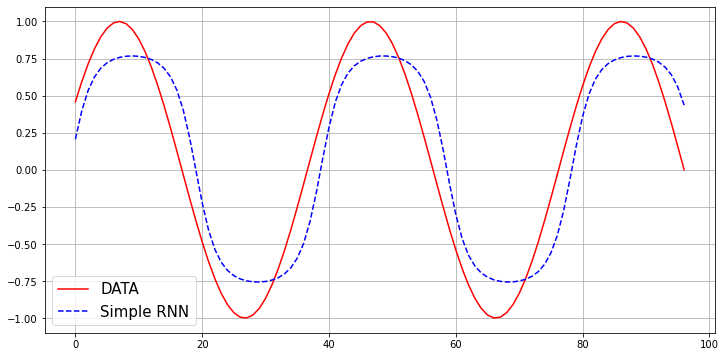

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(s[3:],color="red",label='DATA')
plt.plot(model.predict(X),color='blue',linestyle='--',label='Simple RNN')
plt.grid()
plt.legend(fontsize=15)

In [ ]:
#원래데이터 분포를 많이 흉내냄- 학습이 잘 됨
help(SimpleRNN)